# Prelimiaries

In [1]:
#Load ethanstools from github
devtools::install_github("connoryen/ethanstools")
library(ethanstools)

Skipping install of 'ethanstools' from a github remote, the SHA1 (6634addf) has not changed since last install.
  Use `force = TRUE` to force installation



# Functions

## `pgram()`

Consider a series $Y_t = s_t + X_t$ where $s_t$ is a deterministic seasonal effect and $X_t$ is stationary. If we are able to model seasonality, our model residuals, $Y_t - s_t$ should look stationary. 

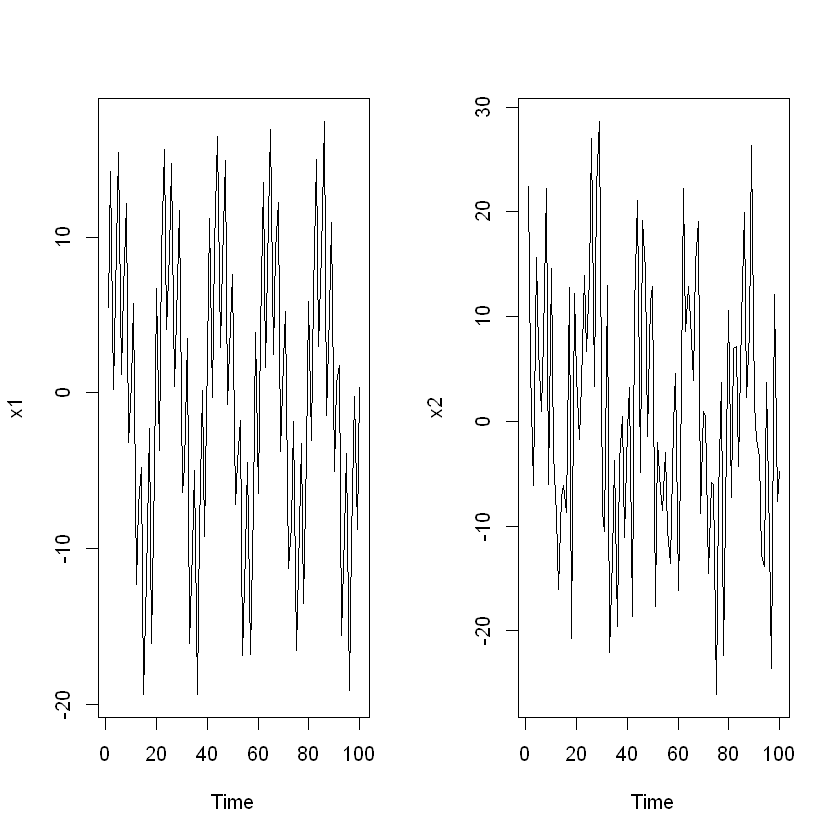

In [2]:
set.seed(03192000)

# data parameters
n = 100
t = 0:(n-1)
f1 = 0.05
f2 = 0.1
f3 = 1/3

# generate data
x0 = 10*sin(2*pi*f1*t) + 3*cos(2*pi*f1*t) + cos(2*pi*f2*t) + 8*sin(2*pi*f3*t)
x1 = x0 + rnorm(t, sd = 1)
x2 = x0 + rnorm(t, sd = 8)

# plot data
par(mfrow = c(1, 2))
plot.ts(x1); plot.ts(x2)

We assume $s_t$ is the sum of a finite set of sinusoids, where a sinusoid is defined as:
$$ \{g(t) = R\ \text{cos}(2\pi ft + \Phi) \ : \ R\in\mathbb{R}_+, f\in\mathbb{R}_+, \Phi\in [0,\ 2\pi /f]\}.$$
Now, with $A = R\ \text{cos}(\Phi)$ and $B = -R\ \text{sin}(\Phi)$, we can rewrite the set of *sinusoids* as:
$$ \{g(t) = A\ \text{cos}(2\pi ft) + B\ \text{sin}(2\pi ft) \ : \ A,B\in\mathbb{R}, f\in\mathbb{R}_+\}.$$
Thus, if we know the appropriate frequencies $f$, we can find coefficients $A$ and $B$ through linear modelling. This is where we use the periodogram. For real valued data $x_0,...,x_{n-1}$ with DFT $b_0, ..., b_{n-1}$, the perioogram is defined as:
$$I(j/n) = \frac{|b_j|^2}{n} \quad \text{for} \ j=1,...,\left\lfloor{\frac{n}{2}}\right\rfloor$$

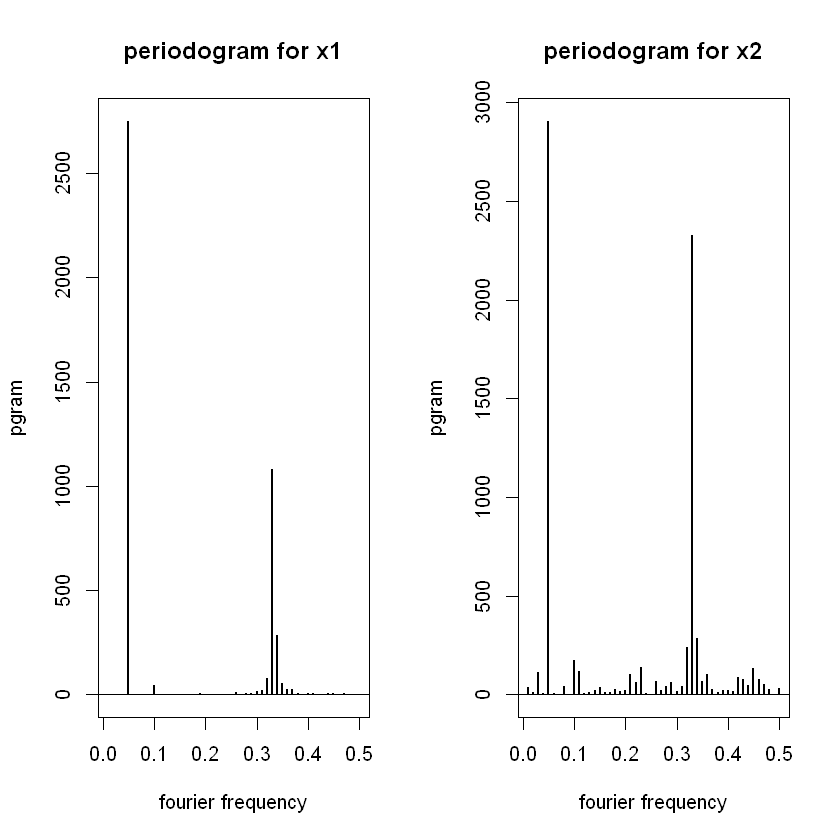

In [3]:
par(mfrow = c(1, 2))
x1_pgram <- ethanstools::pgram(x1, main = 'periodogram for x1')
x2_pgram <- ethanstools::pgram(x2, main = 'periodogram for x2')

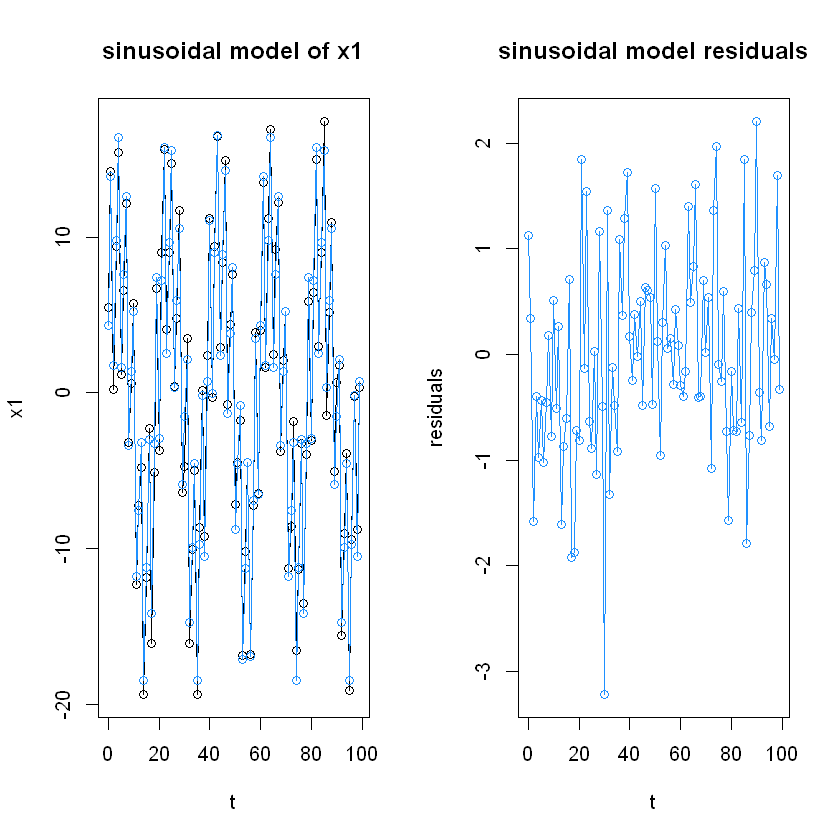

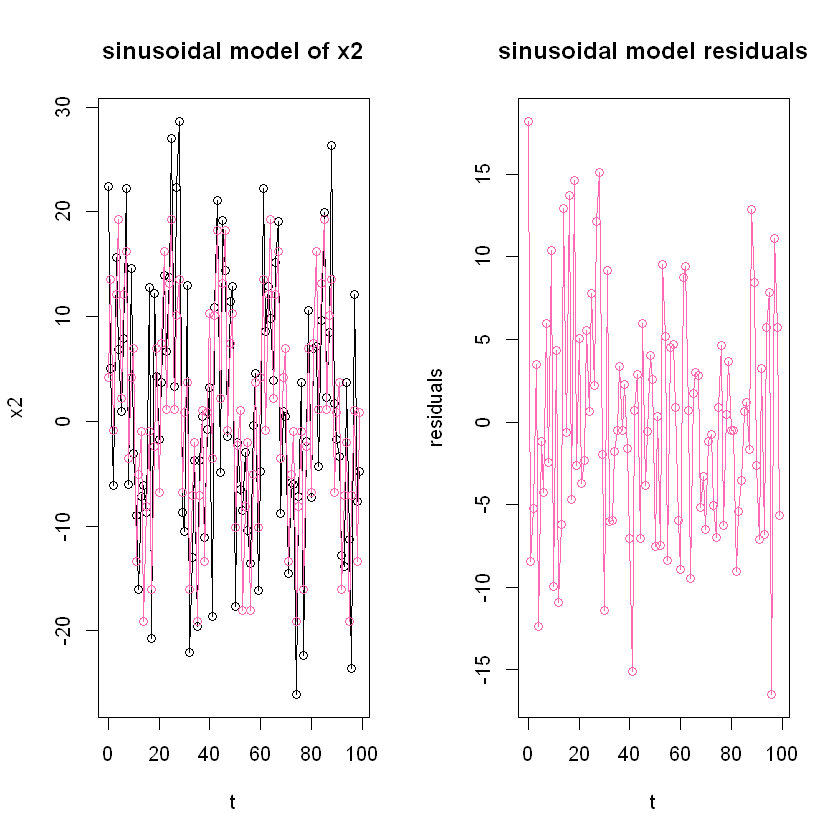

In [4]:
# observed frequencies from the periodogram of x1:
x1_f1 = 0.05
x1_f2 = 0.1
x1_f3 = 0.333333

# observed frequencies from the periodogram of x2:
x2_f1 = 0.05
x2_f2 = 0.333333


# construct sinusoidal models for x1 and x2 based off the observed periodogram frequencies
m1 <- lm(x1 ~ sin(2*pi*x1_f1*t) + cos(2*pi*x1_f1*t) + 
              sin(2*pi*x1_f2*t) + cos(2*pi*x1_f2*t) + 
              sin(2*pi*x1_f3*t) + cos(2*pi*x1_f3*t)) 
m2 <- lm(x2 ~ sin(2*pi*x2_f1*t) + cos(2*pi*x2_f1*t) + 
              sin(2*pi*x2_f2*t) + cos(2*pi*x2_f2*t)) 


# x1 models for deterministic stationary -------------------
par(mfrow = c(1, 2))
# plot model fit
plot(t, x1, type = 'o', main = 'sinusoidal model of x1')
lines(t, m1$fitted.values, col = 'dodgerblue', type = 'o')

# plot model residuals
plot(t, m1$residuals, col = 'dodgerblue', type = 'o', 
     ylab = 'residuals', main = 'sinusoidal model residuals')

# x2 models for deterministic stationary -------------------
par(mfrow = c(1, 2))
# plot model fit
plot(t, x2, type = 'o', main = 'sinusoidal model of x2')
lines(t, m2$fitted.values, col = 'hotpink', type = 'o')

# plot model residuals
plot(t, m2$residuals, col = 'hotpink', type = 'o', 
     ylab = 'residuals', main = 'sinusoidal model residuals')

## `sarima.compare()`

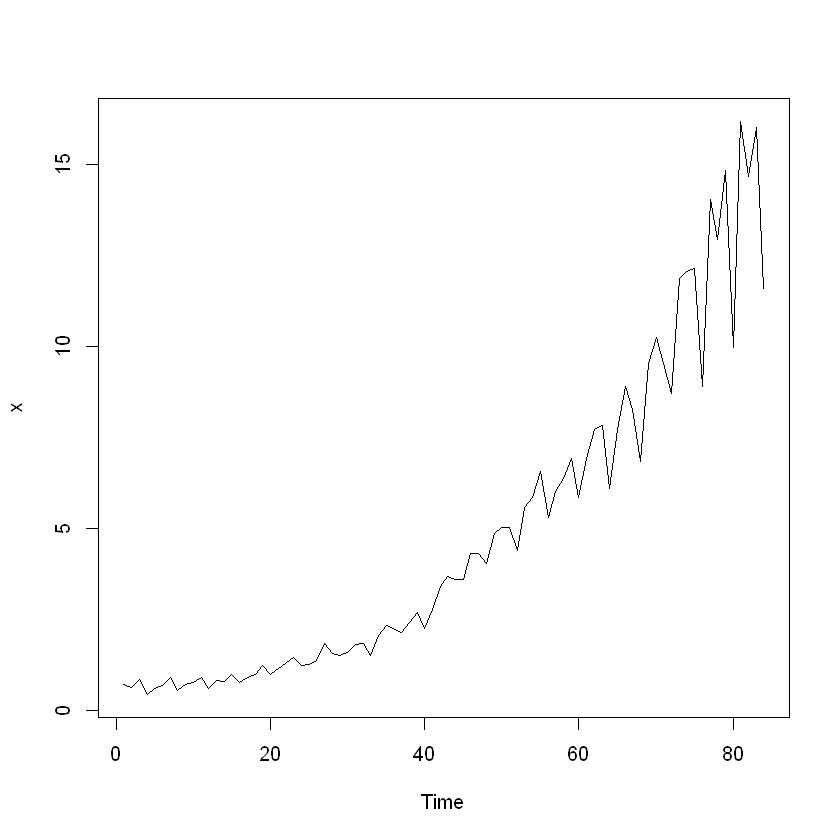

In [5]:
x <- JohnsonJohnson  # get test data
x <- as.vector(x)  # convert out of time series form
plot.ts(x)

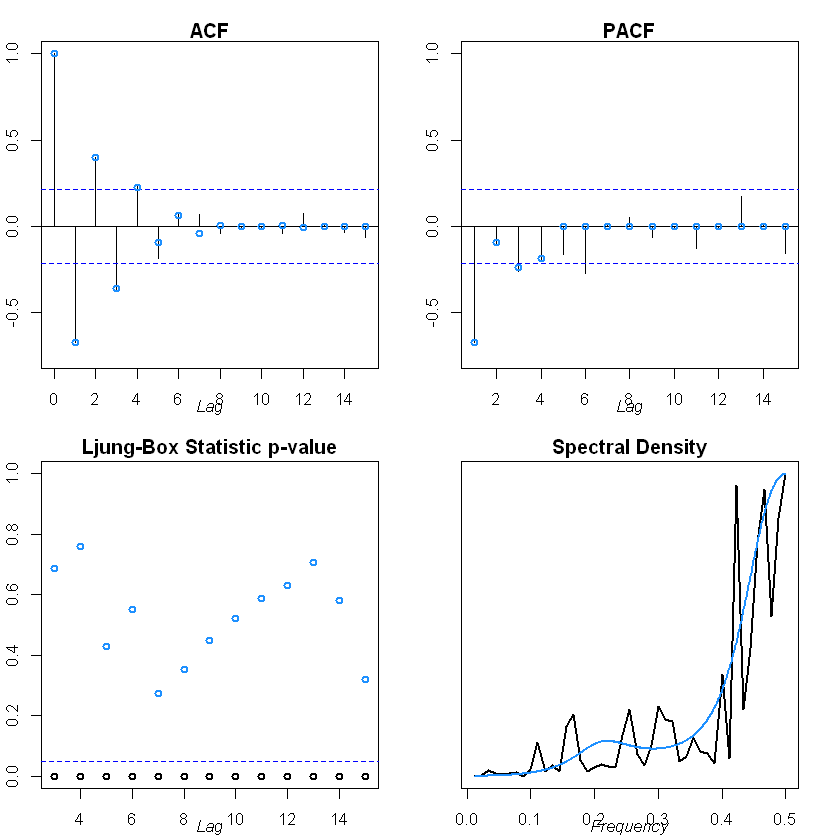

In [6]:
sarima.compare1(x, c(p=4,d=1,q=0, P=0,D=1,Q=0,S=4), 
                ref = c(p=0,d=1,q=0, P=0,D=1,Q=0,S=4))

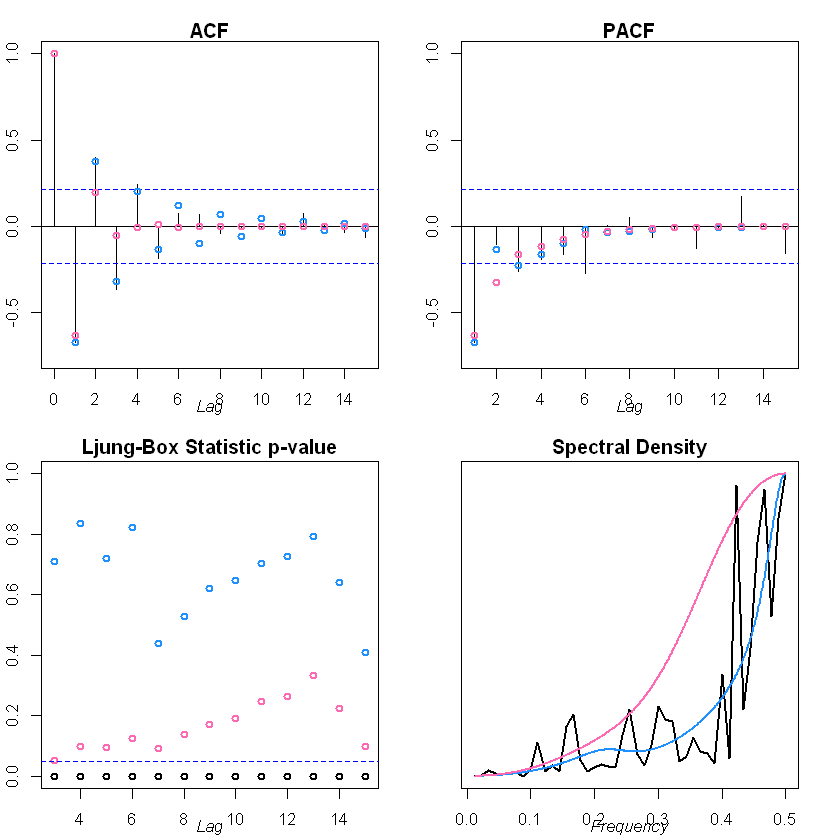

In [7]:
models <- list()
models[['model1']] <- c(p=4,d=1,q=0, P=0,D=1,Q=1,S=4)
models[['model2']] <- c(p=1,d=1,q=1, P=0,D=1,Q=1,S=4)

sarima.compare(x, models, ref = c(p=0,d=1,q=0, P=0,D=1,Q=0,S=4))